In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
file_path = "Online Retail.xlsx"
data = pd.read_excel(file_path)

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day

In [6]:
data.dropna(subset=['CustomerID'], inplace=True)

In [7]:
data = pd.get_dummies(data, columns=['StockCode', 'Country'], drop_first=True)

In [8]:
X = data.drop(columns=['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate'])
y = data['Quantity']
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
print("\nTraining Gradient Boosting Model...")
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train_scaled, y_train)


Training Gradient Boosting Model...


GradientBoostingRegressor(max_depth=6, n_estimators=50, random_state=42)

In [11]:
y_pred_gb = gb_model.predict(X_test_scaled)

In [12]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
error_percent = (mae_gb / np.mean(y_test)) * 100

In [13]:
print("\nGradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R2 Score: {r2_gb}")
print(f"Error Percentage: {error_percent:.2f}%")


Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 9.53804472142567
Root Mean Squared Error (RMSE): 36.239536988509236
R2 Score: 0.25175958551683475
Error Percentage: 78.57%


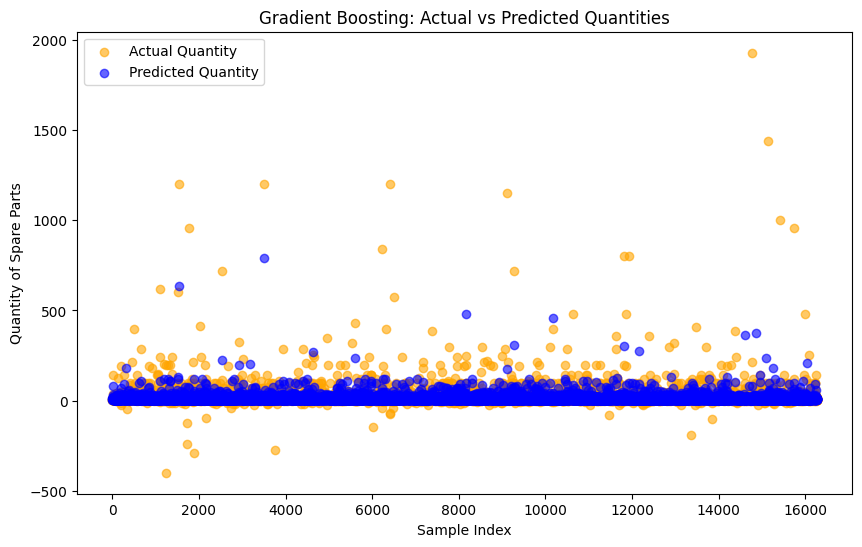

In [14]:
# Visualization for Gradient Boosting predictions (Orange for Actual, Blue for Predicted)
plt.figure(figsize=(10, 6))

# Plot actual values in orange (use sample indices on the x-axis)
plt.scatter(range(len(y_test)), y_test, color='orange', label='Actual Quantity', alpha=0.6)

# Plot predicted values in blue (use sample indices on the x-axis)
plt.scatter(range(len(y_pred_gb)), y_pred_gb, color='blue', label='Predicted Quantity', alpha=0.6)

# Add labels and title
plt.xlabel("Sample Index")
plt.ylabel("Quantity of Spare Parts")
plt.title("Gradient Boosting: Actual vs Predicted Quantities")
plt.legend()

# Show plot
plt.show()


In [17]:
import joblib

# Save the feature names used for training
feature_names = X_train.columns  # Assuming X_train was a DataFrame before scaling
joblib.dump((gb_model, feature_names), 'spare_parts_predictor.pkl')

joblib.dump(gb_model, 'scaler.pkl') 

['scaler.pkl']